<a href="https://colab.research.google.com/github/Glitch0110/AI-GiganciProgramowania/blob/main/L14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [299]:
df = sns.load_dataset('titanic')

print(df.tail(10))

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
881         0       3    male  33.0      0      0   7.8958        S   Third   
882         0       3  female  22.0      0      0  10.5167        S   Third   
883         0       2    male  28.0      0      0  10.5000        S  Second   
884         0       3    male  25.0      0      0   7.0500        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
881    man        True  NaN  Southampton    no   True  
882  woman       F

In [300]:

df = df.dropna(subset=['age'])
print(df.isnull().sum())
print(len(sns.load_dataset('titanic')))
print("After cleaning: ", len(df))

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64
891
After cleaning:  714


In [301]:
def categorize_fare(fare, fare_ranges):
  if fare <= fare_ranges[0]:
    return 0
  elif fare <= fare_ranges[1]:
    return 1
  else:
    return 2
min_fare = df['fare'].min()
max_fare = df['fare'].max()

fare_step = (max_fare - min_fare) / 3
fare_ranges = [min_fare + fare_step, min_fare + 2 * fare_step]

print("\nPrzedziały cenowe biletów:")
print(f"Niska: {min_fare:.2f} - {fare_ranges[0]:.2f}")
print(f"Średnia: {fare_ranges[0]:.2f} - {fare_ranges[1]:.2f}")
print(f"Wysoka: {fare_ranges[1]:.2f} - {max_fare:.2f}")

print("Najmniej zapłacił: ", min_fare)
print("Najwięcej zapłacił: ", max_fare)


Przedziały cenowe biletów:
Niska: 0.00 - 170.78
Średnia: 170.78 - 341.55
Wysoka: 341.55 - 512.33
Najmniej zapłacił:  0.0
Najwięcej zapłacił:  512.3292


In [302]:
selected_features = ['sex', 'pclass', 'age', 'parch', 'fare_category']
df_model = df.copy()

df_model['sex'] = df_model['sex'].map({'male': 0, 'female': 1})
df_model['fare_category'] = df_model['fare'].apply(lambda x: categorize_fare(x, fare_ranges))


In [303]:
X = df_model[selected_features]
Y = df_model['survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state =30)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [304]:
model = LogisticRegression(
    random_state=30,
    C=0.2
)
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Dokładność: {accuracy:.4f}")

Dokładność: 0.7622


              precision    recall  f1-score   support

           0       0.80      0.82      0.81        87
           1       0.70      0.68      0.69        56

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

Fałszywe alarmy:  0.1839080459770115


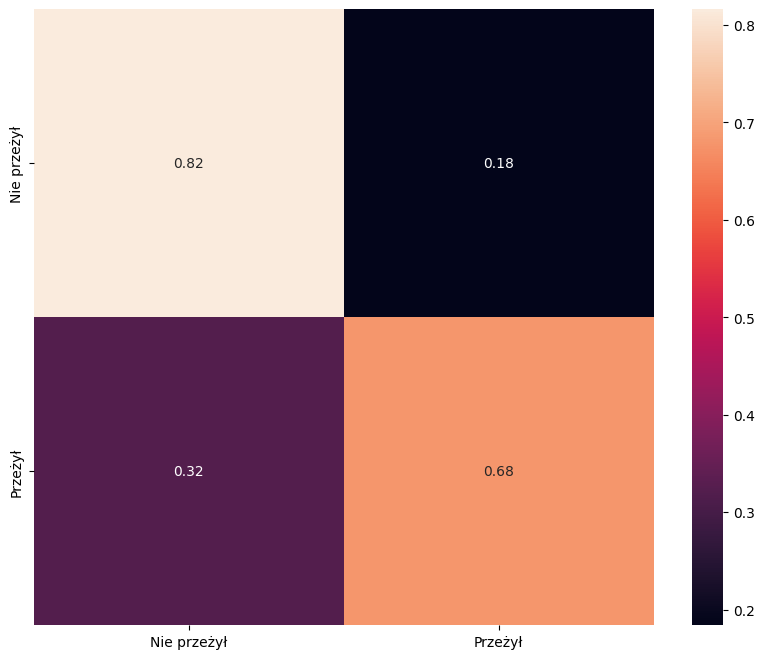

In [305]:
print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred, normalize="true")

tn, fp, fn, tp = conf_matrix.ravel()
print("Fałszywe alarmy: ", fp)

plt.figure(figsize=(10,8))
plt.xlabel('Przeidywanie')
plt.ylabel('Rzeczywistość')
sns.heatmap(conf_matrix, annot=True, xticklabels=["Nie przeżył", "Przeżył"], yticklabels=["Nie przeżył", "Przeżył"])
plt.show()